<a href="https://colab.research.google.com/github/nish700/Computer-Vision-and-Deep-learning/blob/master/MultiLabel_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 21.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth= GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from keras.optimizers import SGD
%matplotlib inline

Using TensorFlow backend.


In [0]:
download= drive.CreateFile({'id':'1tfzpAqlUp8SdZ-mmCpL62YYmPANuIHyn'})
download.GetContentFile('Multi_Label_dataset.zip')

In [6]:
!unzip Multi_Label_dataset.zip

Archive:  Multi_Label_dataset.zip
   creating: Multi_Label_dataset/
  inflating: Multi_Label_dataset/train.csv  
   creating: Multi_Label_dataset/Images/
  inflating: Multi_Label_dataset/Images/tt0095159.jpg  
  inflating: Multi_Label_dataset/Images/tt0094980.jpg  
  inflating: Multi_Label_dataset/Images/tt0094964.jpg  
  inflating: Multi_Label_dataset/Images/tt0094907.jpg  
  inflating: Multi_Label_dataset/Images/tt0094884.jpg  
  inflating: Multi_Label_dataset/Images/tt0094869.jpg  
  inflating: Multi_Label_dataset/Images/tt0094862.jpg  
  inflating: Multi_Label_dataset/Images/tt0094746.jpg  
  inflating: Multi_Label_dataset/Images/tt0094739.jpg  
  inflating: Multi_Label_dataset/Images/tt0094731.jpg  
  inflating: Multi_Label_dataset/Images/tt0094651.jpg  
  inflating: Multi_Label_dataset/Images/tt0094606.jpg  
  inflating: Multi_Label_dataset/Images/tt0094594.jpg  
  inflating: Multi_Label_dataset/Images/tt0093744.jpg  
  inflating: Multi_Label_dataset/Images/tt0094208.jpg  
  infl

In [0]:
train_data = pd.read_csv('Multi_Label_dataset/train.csv')

In [8]:
train_image=[]
count=0
for i in tqdm_notebook(range(2500)):#train_data.shape[0]
  try:
    x = pd.read_csv('Multi_Label_dataset/train.csv')    
    
    image_data = image.load_img('Multi_Label_dataset/Images/'+ str(train_data['Id'][i]) + '.jpg', target_size=(200,200,3))
    
    image_array = image.img_to_array(image_data)
    image_array = image_array / 255
    train_image.append(image_array)
  except:
    print('image '+ train_data['Id'][i] + '.jpg' + ' not found at ' + 'Multi_Label_dataset/Images/' + train_data['Id'][i] + '.jpg')
    print(count , 'error')
    count+=1
X = np.array(train_image)

In [11]:
Y = train_data.drop(['Id','Genre'],axis=1)
Y=Y[:2500]
Y.shape

(2500, 25)

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,random_state=0, test_size=0.15)

In [0]:
'''model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation = 'sigmoid'))

print(model.summary())'''


In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 196, 196, 16)      1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 43, 43, 64)        51264     
__________

In [0]:
plot_model(model,to_file='model_plot')

In [0]:
sgd = SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)

In [0]:
#model.compile(loss='categorical_crossentropy',optimizer=sgd , metrics=['accuracy'])

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), batch_size=64)

Train on 2125 samples, validate on 375 samples
Epoch 1/10
2125/2125 [==============================] - 216s 102ms/step - loss: 0.5015 - acc: 0.7606 - val_loss: 0.4040 - val_acc: 0.9060
Epoch 2/10
2125/2125 [==============================] - 215s 101ms/step - loss: 0.3383 - acc: 0.8766 - val_loss: 0.2812 - val_acc: 0.9053
Epoch 3/10
2125/2125 [==============================] - 216s 102ms/step - loss: 0.2941 - acc: 0.8962 - val_loss: 0.2610 - val_acc: 0.9053
Epoch 4/10
2125/2125 [==============================] - 215s 101ms/step - loss: 0.2796 - acc: 0.9003 - val_loss: 0.2543 - val_acc: 0.9053
Epoch 5/10
2125/2125 [==============================] - 215s 101ms/step - loss: 0.2704 - acc: 0.9029 - val_loss: 0.2560 - val_acc: 0.9053
Epoch 6/10
2125/2125 [==============================] - 215s 101ms/step - loss: 0.2655 - acc: 0.9039 - val_loss: 0.2494 - val_acc: 0.9053
Epoch 7/10
2125/2125 [==============================] - 215s 101ms/step - loss: 0.2619 - acc: 0.9042 - val_loss: 0.2500 - val

In [0]:
#model.fit(X_train,Y_train,batch_size=32,epochs=10, validation_data=(X_val,Y_val))

In [25]:
score= model.evaluate(X_val,Y_val,batch_size=32)

375/375 [==============================] - 13s 34ms/step


In [26]:
print(score)

[0.2363029717604319, 0.9052799995740255]


In [0]:
image_test = image.load_img('poster1.jpg',target_size=(200,200,3))
image_test_array= image.img_to_array(image_test)
image_test_array = image_test_array/255

Drama 0.5164434313774109
Comedy 0.4201201796531677
Action 0.2190456986427307


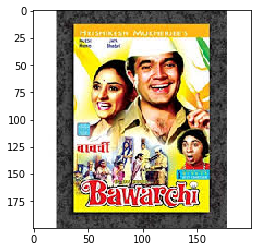

In [31]:
classes = np.array(train_data.columns[2:])
probability = model.predict(image_test_array.reshape(1,200,200,3))
top_3 = np.argsort(probability[0])[:-4:-1]
for i in range(3):
  print("{}".format(classes[top_3[i]]) + " {}".format(probability[0][top_3[i]]))
plt.imshow(image_test_array)

In [0]:
image_test_n = image.load_img('poster5.jpg',target_size=(200,200,3))
image_test_array_n= image.img_to_array(image_test_n)
image_test_array_n = image_test_array_n/255

Drama 0.5095665454864502
Comedy 0.3698672652244568
Action 0.24018913507461548
Crime 0.22441542148590088
Romance 0.14507171511650085


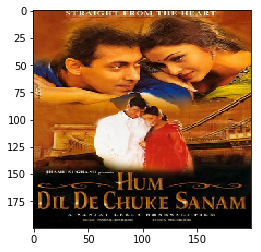

In [46]:
classes_n = np.array(train_data.columns[2:])
probability_n = model.predict(image_test_array_n.reshape(1,200,200,3))
top_3_n = np.argsort(probability_n[0])[:-6:-1]
for i in range(5):
  print("{}".format(classes_n[top_3_n[i]]) + " {}".format(probability_n[0][top_3_n[i]]))
plt.imshow(image_test_array_n)